In [ ]:
import pandas as pd
import numpy as np

from os import listdir
from os.path import isfile, join

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/CAX_Train1'

In [ ]:
PH_data_six = pd.DataFrame()

In [ ]:
files = [f for f in listdir(file_path) if isfile(join(file_path, f))]
for idy, file_iter in enumerate(files):
    print ("File no " + str(idy) + " of "+ str(len(files)))
    data = pd.read_csv('/content/drive/MyDrive/CAX_Train1/'+ file_iter)
    PH_six = data['PH'] == 6
    PH_data_six = PH_data_six.append(data[PH_six])

File no 0 of 200
File no 1 of 200
File no 2 of 200
File no 3 of 200
File no 4 of 200
File no 5 of 200
File no 6 of 200
File no 7 of 200
File no 8 of 200
File no 9 of 200
File no 10 of 200
File no 11 of 200
File no 12 of 200
File no 13 of 200
File no 14 of 200
File no 15 of 200
File no 16 of 200
File no 17 of 200
File no 18 of 200
File no 19 of 200
File no 20 of 200
File no 21 of 200
File no 22 of 200
File no 23 of 200
File no 24 of 200
File no 25 of 200
File no 26 of 200
File no 27 of 200
File no 28 of 200
File no 29 of 200
File no 30 of 200
File no 31 of 200
File no 32 of 200
File no 33 of 200
File no 34 of 200
File no 35 of 200
File no 36 of 200
File no 37 of 200
File no 38 of 200
File no 39 of 200
File no 40 of 200
File no 41 of 200
File no 42 of 200
File no 43 of 200
File no 44 of 200
File no 45 of 200
File no 46 of 200
File no 47 of 200
File no 48 of 200
File no 49 of 200
File no 50 of 200
File no 51 of 200
File no 52 of 200
File no 53 of 200
File no 54 of 200
File no 55 of 200
Fi

In [ ]:
PH_data_six.to_pickle('PH_data_six.df')

In [ ]:

import pandas as pd
import numpy as np

from math import sqrt

from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler

import pickle
import itertools

In [ ]:
pickle_file = open("PH_data_six.df", "rb")

In [ ]:
training_data = pd.read_pickle('PH_data_six.df')

In [ ]:
training_data

,ACID,Flight_instance_ID,Year,Month,Day,Hour,Minute,Second,ABRK,ELEV_1,...,BPGR_2,BPYR_1,BPYR_2,CALT,CASS,CRSS,DFGS,DWPT,EAI,FF
2112,676,676200405111519,2004,5,11,15,53,30,119.983559,-6.180332,...,24.414124,48.828247,0.0,0,278.0,23.993969,1,60436,0,4384
2113,676,676200405111519,2004,5,11,15,53,31,119.983559,-5.709801,...,24.414124,43.945423,0.0,0,278.0,23.993969,1,60432,0,4332
2114,676,676200405111519,2004,5,11,15,53,32,119.983559,-6.078045,...,24.414124,43.945423,0.0,0,278.0,23.993969,1,60428,0,4280
2115,676,676200405111519,2004,5,11,15,53,33,119.983559,-5.893921,...,24.414124,48.828247,0.0,0,278.0,23.993969,1,60420,0,4236
2116,676,676200405111519,2004,5,11,15,53,34,119.983559,-5.362015,...,24.414124,43.945423,0.0,0,278.0,23.993969,1,60416,0,4208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3863,676,676201003140736,2002,3,14,8,39,53,60.000000,4.866985,...,24.414124,53.711075,0.0,0,120.0,61.962448,1,8,0,1878
3864,676,676201003140736,2002,3,14,8,39,54,60.000000,2.555233,...,24.414124,53.711075,0.0,0,120.0,61.962448,1,16,0,1670
3865,676,676201003140736,2002,3,14,8,39,55,60.000000,0.079815,...,24.414124,53.711075,0.0,0,120.0,61.962448,1,16,0,1538
3866,676,676201003140736,2002,3,14,8,39,56,60.000000,0.161648,...,24.414124,53.711075,0.0,0,120.0,61.962448,1,16,0,1428


In [ ]:
feature_columns = [col for col in training_data.columns if not (col=='FF' or col=='Flight_instance_ID' or  col=='ACID')]

y = training_data['FF'].values
X = training_data[feature_columns].values

In [ ]:
X = StandardScaler().fit(X).transform(X)

In [ ]:
from sklearn.feature_selection import VarianceThreshold
X = VarianceThreshold(threshold=0.0).fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=42)

# **Random Forest**

In [ ]:
rfr = RandomForestRegressor(n_estimators=10)

In [ ]:
rfr.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10)

In [ ]:
y_pred = rfr.predict(X_val)

In [ ]:
pickle.dump( rfr, open( "ph_six_rf_gen_six.model", "wb" )) 


In [ ]:
feat_column = np.array(feature_columns)
sort_index = np.array(np.argsort(rfr.feature_importances_))

In [ ]:
print(feat_column[sort_index])

['FIRE_3' 'HDGS' 'OIT_2' 'CAS_Mean' 'OIT_3' 'LOC' 'CWPF_Max' 'MSQT_1_Mean'
 'CWPF_Min' 'GPWS' 'BAL2_Min' 'ALT_Mean' 'TOCW_Min' 'Year' 'BAL2_Max'
 'TOCW_Max' 'OIT_1' 'ILSF' 'WD_Min' 'WD_Mean' 'PH' 'TRKM_Min' 'LONP'
 'DA_Min' 'CCPF_Min' 'VIB_1_Max' 'SPLG' 'FADF' 'DA_Max' 'GS_Min' 'SPL_1'
 'GS_Mean' 'GS_Max' 'LATG_Mean' 'SPLY' 'SNAP' 'RUDD_Mean' 'CWPC_Mean'
 'DA_Mean' 'N1T_Min' 'VIB_1_Mean' 'CASM_Min' 'SPL_2' 'CCPF_Max' 'AOA1_Min'
 'PT_Min' 'Month' 'AOA1_Max' 'BAL1_Mean' 'TRKM_Max' 'TAI' 'AOAI_Min'
 'TH_Mean' 'CASM_Max' 'PT_Mean' 'NSQT_Max' 'HYDY' 'AOAI_Max' 'N1T_Max'
 'TAS_Max' 'AOAI_Mean' 'NSQT_Min' 'CWPC_Min' 'AOA2_Mean' 'CWPC_Max'
 'FIRE_4' 'POVT' 'HF1' 'FLAP' 'TAS_Min' 'MSQT_1_Max' 'NSQT_Mean'
 'AOAC_Min' 'MH_Mean' 'N1T_Mean' 'Second' 'PSA_Max' 'MACH_Max' 'FQTY_2'
 'LONG_Max' 'ALTR_Mean' 'MRK' 'TMODE' 'LONG_Min' 'APUF_Mean' 'WS_Max'
 'ALT_Max' 'ALT_Min' 'PS_Mean' 'FIRE_2' 'WAI_2' 'CWPF_Mean' 'MACH_Mean'
 'Hour' 'MH_Min' 'PSA_Min' 'WD_Max' 'MNS' 'MH_Max' 'AOAC_Max' 'Day'
 'PT_Max' 'EL

In [ ]:
print(np.argsort(rfr.feature_importances_))

[ 15  24  40 137  41  32  82  83  81  23 135 113 111   0 136 112  39  29
 183 182  44 177  33 144  75 181  52  10 145 147  54 146 148 149  53  51
 101  77 143 162 179 141  55  76 120  99   1 121 131 178  56 129 170 142
  98 166  28 130 163 169 128 165  78 122  79  16  45  25  17 168  85 164
 126 158 161   5  97 157  19 154 116  35  60 153  68 187 115 114  92  14
  67  80 155   3 159  96 184  34 160 127   2 100   8 106 167  90  20  69
 103  61  91   4  66  59  87 105  46  71  47 156  57  89 180  11 102  58
  62 152 188  26 118  48  84  13 107   7  64  43 138 140  22  37 117  88
  31  70  12   6  95  86  21  65 104  49  50   9  42  94 139  36  18  30
  63 151  74  27  73 185  93 108 172  72 123 124 109 150 110 133 176 174
 132  38 171 189 186 173 175 125 119 134]


In [ ]:
print("RMSE", sqrt(mean_squared_error(y_val, y_pred)))

RMSE 134.66190293930723


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
R2_score = r2_score(y_val, y_pred)
print("R2_Score:",R2_score)

R2_Score: 0.9854686178714137


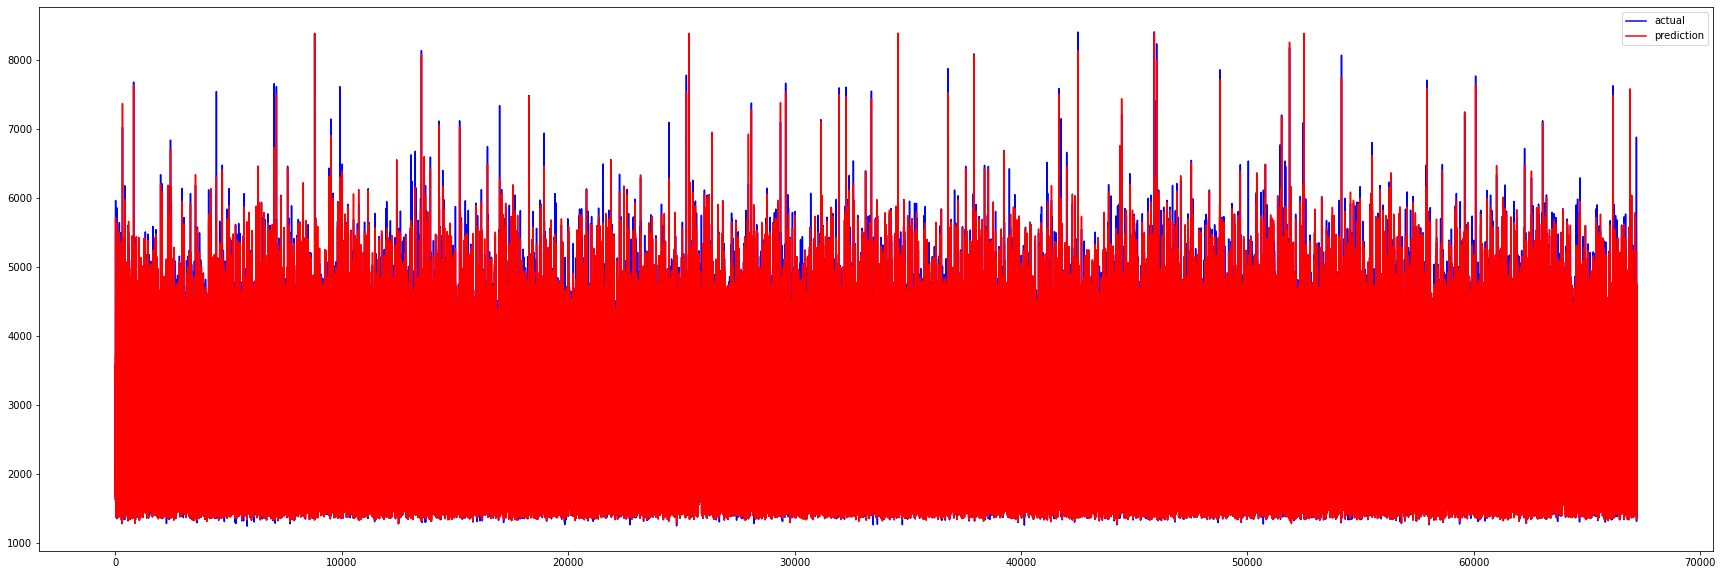

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(30,10))
plt.plot(y_val,c='blue',label='actual')
plt.plot(y_pred,c='red',label='prediction')
plt.legend()
plt.show()


# **GRADIENT BOOSTING REGRESSOR**

In [ ]:

from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
rfr = GradientBoostingRegressor(n_estimators=10, random_state= 0 )

In [ ]:
rfr.fit(X_train,y_train)

GradientBoostingRegressor(n_estimators=10, random_state=0)

In [ ]:
pickle.dump( rfr, open( "ph_six_rf_gen_six.model", "wb" )) 


In [ ]:
y_pred = rfr.predict(X_val)

In [ ]:
feat_column = np.array(feature_columns)
sort_index = np.array(np.argsort(rfr.feature_importances_))

In [ ]:
print(feat_column[sort_index])

['Year' 'TOCW_Mean' 'TOCW_Min' 'TOCW_Max' 'ALT_Mean' 'ALT_Min' 'ALT_Max'
 'ALTR_Mean' 'ALTR_Min' 'ALTR_Max' 'WD_Mean' 'AOA1_Min' 'AOA1_Max'
 'AOA2_Mean' 'AOA2_Min' 'AOA2_Max' 'VIB_1_Max' 'AOAC_Min' 'SHKR_Max'
 'SHKR_Min' 'SHKR_Mean' 'RUDP_Max' 'MSQT_2_Max' 'WD_Min' 'PI_Min' 'PI_Max'
 'PS_Mean' 'PS_Min' 'RALT_Mean' 'PSA_Mean' 'AOAC_Max' 'PSA_Min' 'PT_Mean'
 'PT_Min' 'PT_Max' 'RUDD_Mean' 'RUDD_Min' 'RUDD_Max' 'RUDP_Mean'
 'RUDP_Min' 'PSA_Max' 'AOAI_Mean' 'AOAI_Min' 'AOAI_Max' 'LONG_Min'
 'LONG_Max' 'MACH_Mean' 'MACH_Min' 'MACH_Max' 'MH_Mean' 'MH_Min' 'MH_Max'
 'LONG_Mean' 'N1T_Mean' 'N1T_Max' 'NSQT_Mean' 'NSQT_Min' 'NSQT_Max'
 'TAS_Mean' 'TAS_Min' 'TAS_Max' 'TH_Mean' 'N1T_Min' 'MSQT_2_Min'
 'LATG_Max' 'LATG_Mean' 'BAL1_Mean' 'VIB_1_Min' 'VIB_1_Mean' 'TRKM_Max'
 'BAL2_Min' 'BAL2_Max' 'CAS_Mean' 'CAS_Min' 'LATG_Min' 'CAS_Max'
 'CASM_Min' 'CASM_Max' 'DA_Mean' 'DA_Min' 'DA_Max' 'GS_Mean' 'GS_Min'
 'GS_Max' 'CASM_Mean' 'TRKM_Min' 'MSQT_2_Mean' 'MSQT_1_Min' 'GPWS' 'HDGS'
 'HF1' 'HF2' 'HYDG' 'H

In [ ]:
print(np.argsort(rfr.feature_importances_))

[  0 110 111 112 113 114 115 116 117 118 182 120 121 122 123 124 181 126
 109 108 107 106  88 183  90  91  92  93 188  95 127  96  98  99 100 101
 102 103 104 105  97 128 129 130 153 154 155 156 157 158 159 160 152 161
 163 164 165 166 167 168 169 170 162  87 151 149 131 180 179 178 135 136
 137 138 150 139 141 142 143 144 145 146 147 148 140 177  86  84  23  24
  25  26  27  28  29  30  31  32  33  34  35  36  37 184  39  22  21  20
  19   1   2   3   4   5   6   7   8  40 187 185  12  13  14  15  16  17
  18  10  41  42  43  66  67  68  69  70  71  72  73  65  74  76  77  78
  79  80  81  82  83  75  85  64  62  44  45  46  47  48  50  51  63  52
  54  55  56  57  58  59  60  61  53 174  49 189  94  89  11 172 132  38
 171   9 176 186 133 125 173 119 175 134]


In [ ]:
print("RMSE", sqrt(mean_squared_error(y_val, y_pred)))

RMSE 642.5050679739855


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
R2_score = r2_score(y_val, y_pred)
print("R2_Score:",R2_score)

R2_Score: 0.6691961585034415


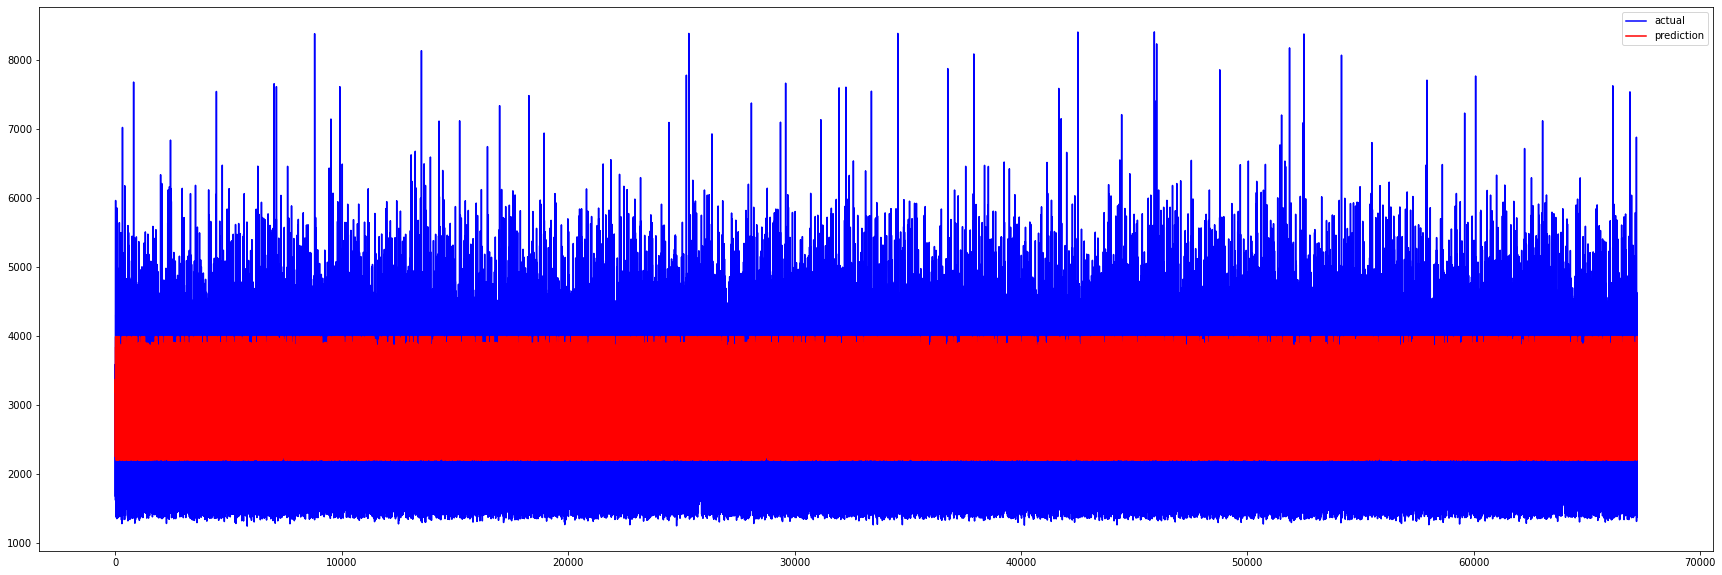

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(30,10))
plt.plot(y_val,c='blue',label='actual')
plt.plot(y_pred,c='red',label='prediction')
plt.legend()
plt.show()

# **K NEAREST NEIGHBOURS**

In [ ]:
from sklearn import neighbors

In [ ]:
rfr = neighbors.KNeighborsRegressor(n_neighbors =20 )

In [ ]:
rfr.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=20)

In [ ]:

y_pred = rfr.predict(X_val)

In [ ]:
pickle.dump( rfr, open( "ph_six_rf_gen_six.model", "wb" )) 

In [ ]:
print("RMSE", sqrt(mean_squared_error(y_val, y_pred)))

RMSE 358.2359466331807


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
R2_score = r2_score(y_val, y_pred)
print("R2_Score:",R2_score)

R2_Score: 0.8971614952420122


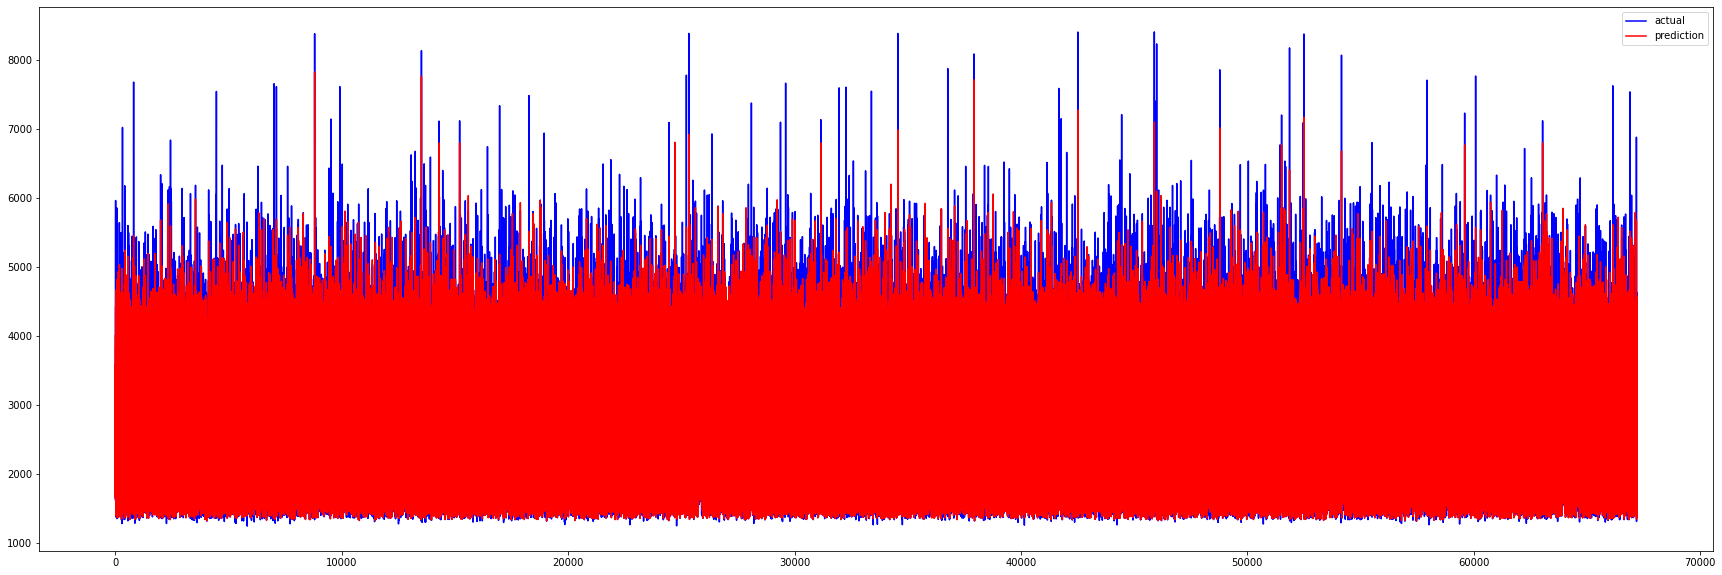

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(30,10))
plt.plot(y_val,c='blue',label='actual')
plt.plot(y_pred,c='red',label='prediction')
plt.legend()
plt.show()

# **ANN**

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
from tensorflow.keras.optimizers import RMSprop

In [ ]:
# Initialising the ANN
regressor = Sequential()

# Adding the input layer and the first hidden layer
regressor.add(Dense(40, kernel_initializer = 'he_uniform',activation='relu',input_shape=(190,)))
                                                                                         
                                                                                         
regressor.add(Dense(40, kernel_initializer = 'he_uniform',activation='relu'))
regressor.add(Dense(40, kernel_initializer = 'he_uniform',activation='relu'))
regressor.add(Dense(40, kernel_initializer = 'he_uniform',activation='relu'))
regressor.add(Dense(40, kernel_initializer = 'he_uniform',activation='relu'))
regressor.add(Dense(40, kernel_initializer = 'he_uniform',activation='relu'))

# Adding the output layer
regressor.add(Dense( 1, kernel_initializer = 'glorot_uniform', activation = 'linear'))

# Compiling the ANN
regressor.compile(optimizer = RMSprop(0.001), loss = 'mean_absolute_error', metrics = ['mean_absolute_error'])

In [ ]:
regressor.fit(X_train,y_train,epochs=25)

Epoch 1/25
4902/4902 [==============================] - 16s 3ms/step - loss: 69.6012 - mean_absolute_error: 69.6012
Epoch 2/25
4902/4902 [==============================] - 11s 2ms/step - loss: 69.3335 - mean_absolute_error: 69.3335
Epoch 3/25
4902/4902 [==============================] - 11s 2ms/step - loss: 69.0995 - mean_absolute_error: 69.0995
Epoch 4/25
4902/4902 [==============================] - 12s 2ms/step - loss: 68.9343 - mean_absolute_error: 68.9343
Epoch 5/25
4902/4902 [==============================] - 10s 2ms/step - loss: 68.5247 - mean_absolute_error: 68.5247
Epoch 6/25
4902/4902 [==============================] - 10s 2ms/step - loss: 68.5315 - mean_absolute_error: 68.5315
Epoch 7/25
4902/4902 [==============================] - 10s 2ms/step - loss: 68.0446 - mean_absolute_error: 68.0446
Epoch 8/25
4902/4902 [==============================] - 9s 2ms/step - loss: 67.9144 - mean_absolute_error: 67.9144
Epoch 9/25
4902/4902 [==============================] - 9s 2ms/step - los

In [ ]:
y_pred= regressor.predict(X_val)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error as mae
R2_score = r2_score(y_val,y_pred)
MSE = mean_squared_error(y_val,y_pred)
from math import sqrt
RMSE=sqrt(mean_squared_error(y_val,y_pred))
MAE = mae(y_val,y_pred)
print("R2_Score:",R2_score)
print("MSE:",MSE)
print("RMSE:",RMSE)
print("MAE:",MAE)

R2_Score: 0.9909867068196742
MSE: 11220.049654391298
RMSE: 105.92473580043189
MAE: 67.8182482724032


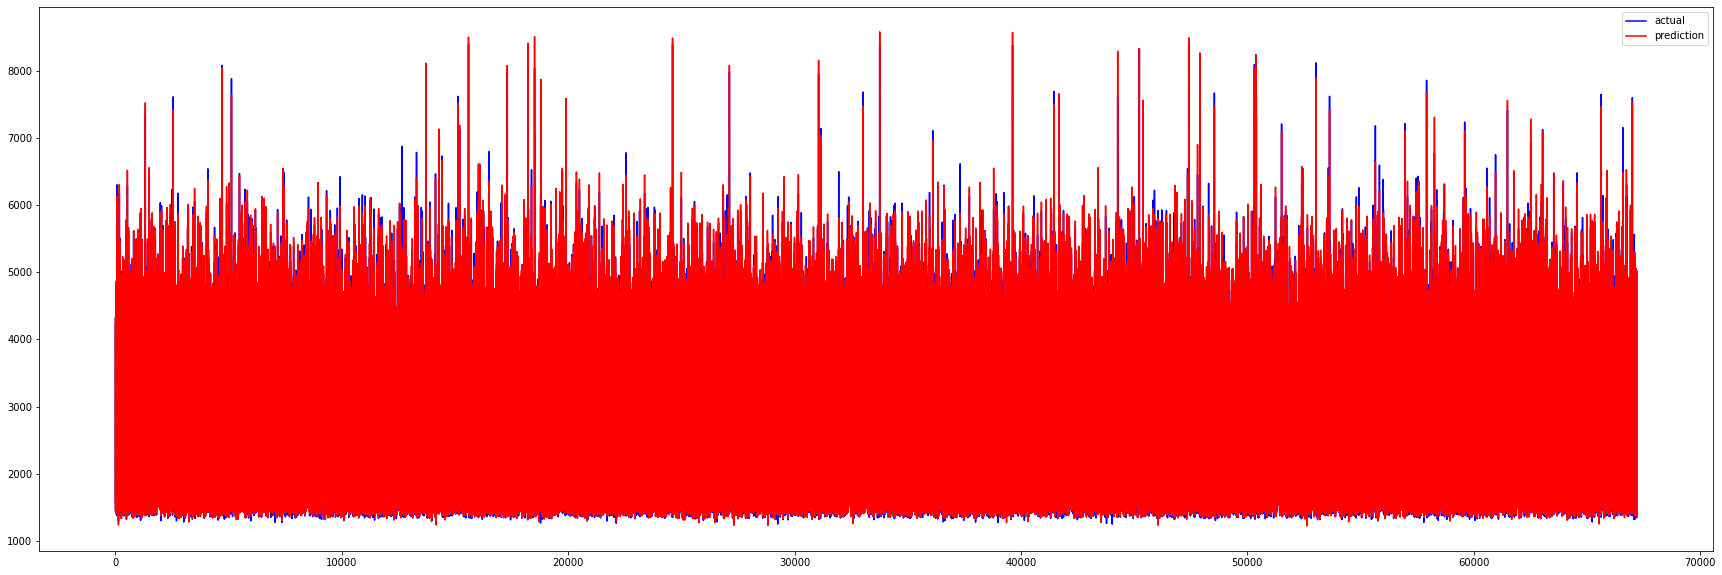

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(30,10))
plt.plot(y_val,c='blue',label='actual')
plt.plot(y_pred,c='red',label='prediction')
plt.legend()
plt.show()

# **CNN**

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv1D, MaxPooling1D

In [ ]:
model = Sequential()
model.add(Conv1D(32, 2, activation="relu", input_shape=(190,1)))
model.add(Flatten())

In [ ]:
model.add(Dense(64, activation="relu"))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam")

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 189, 32)           96        
                                                                 
 flatten_1 (Flatten)         (None, 6048)              0         
                                                                 
 dense_24 (Dense)            (None, 64)                387136    
                                                                 
 dense_25 (Dense)            (None, 1)                 65        
                                                                 
Total params: 387,297
Trainable params: 387,297
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, batch_size=12,epochs=50, verbose=0)

In [ ]:
y_pred = model.predict(X_val)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error as mae
R2_score = r2_score(y_val,y_pred)
MSE = mean_squared_error(y_val,y_pred)
from math import sqrt
RMSE=sqrt(mean_squared_error(y_val,y_pred))
MAE = mae(y_val,y_pred)
print("R2_Score:",R2_score)
print("MSE:",MSE)
print("RMSE:",RMSE)
print("MAE:",MAE)

R2_Score: 0.9924595191250084
MSE: 9386.643498967473
RMSE: 96.88469176793346
MAE: 65.56920410247042


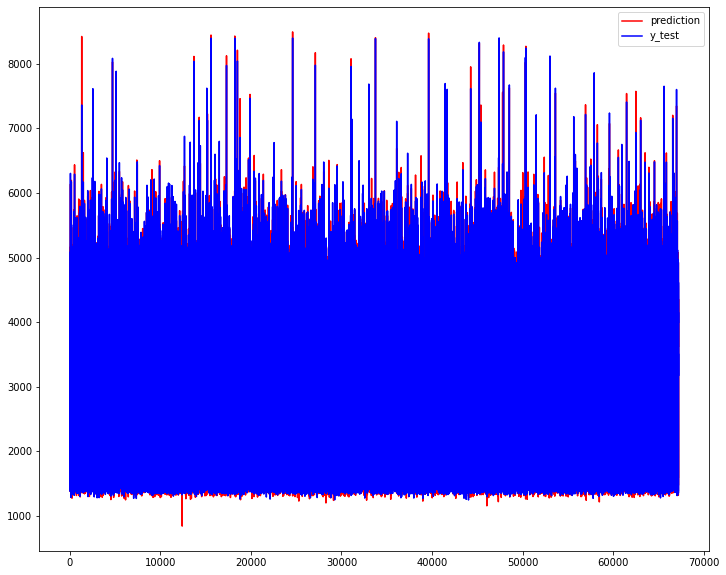

In [ ]:
fig = plt.figure(figsize=(12,10))
plt.plot(y_pred,c='red',label='prediction')
plt.plot(y_val,c='blue',label='y_test')
plt.legend()
plt.show()